<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JoelOrlandoHR/blob/main/ActividadSemanal6_A00759664.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###Tecnológico de Monterrey
### **Semana 7** - **Actividad Semanal 6 - Visualización**
###Prof Jobish Vallikavungal Devassia
<br>

###Alumno: Joel Orlando Hernández Ramos
###Matrícula: A00759664



Fecha de entrega: Noviembre 1, 2022

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

1. Descarga los datos a un sitio externo. y carga el dataset en tu libreta. Descripción aquí. 

In [ ]:
filename='https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [ ]:
df= pd.read_csv(filename, sep=',')

2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [ ]:
df.shape

(30000, 25)

Con el método de shape nos percatamos que nuestro DataFrame tiene 30,000 renglones y columnas. 

In [ ]:
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

De esas 25 variables, nos damos cuenta que realmente las de nuestro interes son 23 variables de entrada X y una variable de salida Y. 


In [ ]:
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [ ]:
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

Con estos dos últimos métodos, nos damos cuenta de que nuestras variables son numeros solamente. tenemos 23 columnas float y 2 columnas integer. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [ ]:
df.isnull().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

Con los métodos info y isnull nos podemos dar cuenta que practicamente todas las columnas tienen valores nulos o faltantes. Esto por que nuestra propiedad shape nos habia dicho que habia 30,000 renglones, por lo que si nuestros métodos encuentran una cantidad menor a 30,000 de nuLa cantidad de variables nulas por columnas varia, pero nos podemos dar una idea de que 

3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna

En tareas anteriores hemos concluido que este dataset esta conformado por variables de dos tipos: númericas y categóricas. 

Especificamente, basado en la descripción del dataset que se nos proporciono, sabemos que las siguientes variables son categóricas o binarias:

1. X2 (GENDER)
2. X3 (EDUCATION)
3. X4 (MARITAL STATUS)
4. X6-X11 (PAYMENT STATUS)
5. Y (OUTPUT)

Todas estas variables tienen rango específico de variables númericas. Por ejemplo, el genero solo puede tomar valores de 1 = masculino; 2 = femenino. 

El resto de las variables de entrada son variables númericas. 

En este sentido, como tenemos diferentes tipos de variables, una sola imputación de datos no sería lo ideal. Se tendría que hacer imputaciones dependiendo de cada tipo de variable que tengamos. Por este motivo, vamos eliminar los datos nulos. 

In [ ]:
df.dropna(inplace=True)
df.shape

(29958, 25)

Ahora nos podemos dar cuenta de que hemos eliminato un total de 42 renglones. A continuación confirmamos que ya no tenemos datos nulos. 

In [ ]:
df.isnull().any()

ID     False
X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y      False
dtype: bool

4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

> Variables Categóricas

Antes de hacer el análisis descriptivo de estas variables, lo que haremos es analizar que todos los valores que tenemos en cada columna son los estipulados en la descripción de nuestro dataset. 

In [ ]:
df['X2'].unique()

array([2., 1.])

In [ ]:
df['X3'].unique()

array([2., 1., 3., 5., 4., 6., 0.])

En este caso, nos damos cuenta de que según la descripción deberíamos tener solamente valores de 1 a 4. Debido a que 4 corresponde a la categoría 'otros', entonces meteremos todos los valores no deseados dentro de 'otros'. 

In [ ]:
df['X3'].replace(5.0, 4.0, inplace=True )
df['X3'].replace(6.0, 4.0, inplace=True )
df['X3'].replace(0, 4.0, inplace=True )

In [ ]:
df['X4'].unique()

array([1., 2., 3., 0.])

Similarmente, nos damos cuenta de que según la descripción deberíamos tener solamente valores de 1 a 3. Debido a que 43corresponde a la categoría 'otros', entonces meteremos todos los valores no deseados dentro de 'otros'. 

In [ ]:
df['X4'].replace(0, 3.0, inplace=True )

In [ ]:
print(df['X6'].unique())
print(df['X7'].unique())
print(df['X8'].unique())
print(df['X9'].unique())
print(df['X10'].unique())
print(df['X11'].unique())

[ 2. -1.  0. -2.  1.  3.  4.  8.  7.  5.  6.]
[ 2.  0. -1. -2.  3.  5.  7.  4.  1.  6.  8.]
[-1.  0.  2. -2.  3.  4.  6.  7.  1.  5.  8.]
[-1.  0. -2.  2.  3.  4.  5.  7.  6.  1.  8.]
[-2.  0. -1.  2.  3.  5.  4.  7.  8.  6.]
[-2.  2.  0. -1.  3.  6.  4.  7.  8.  5.]


En este caso, nos damos cuenta de que según la descripción deberíamos tener solamente valores de -1, 1,2,3,4,5,6,7,8. En este caso los valores -2 y 0 serán agrupados dentro de la categoría 'pay duly'. Este misma, será redifinida como 0 en lugar de -1.

In [ ]:
df['X6'].replace([np.nan,0,-1,-2], 0.0, inplace=True )
df['X7'].replace([np.nan,0,-1,-2], 0.0, inplace=True )
df['X8'].replace([np.nan,0,-1,-2], 0.0, inplace=True )
df['X9'].replace([np.nan,0,-1,-2], 0.0, inplace=True )
df['X10'].replace([np.nan,0,-1,-2], 0.0, inplace=True )
df['X11'].replace([np.nan,0,-1,-2], 0.0, inplace=True )

Ahora que nuestros datos categóricos ya no tienen valores nulos o valores átipicos fuera de la escala definida en la descripción del dataset, entonces llamamos a las funciones de descripción. 

In [ ]:
df[['X2', 'X3', 'X4', 'X6','X7','X8','X9','X10', 'X11', 'Y']].describe()

,X2,X3,X4,X6,X7,X8,X9,X10,X11,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,1.604012,1.842212,1.557147,0.356599,0.319881,0.303692,0.258462,0.221043,0.226183,0.221143
std,0.489070,0.744557,0.521388,0.760665,0.801690,0.789342,0.760100,0.716527,0.714501,0.415023
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,4.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,1.000000


Con el método describe() nos podemos dar cuenta de que todas nuestras columnas tienen 29958 entradas por lo que podemos afirmar que no tenemos datos nulos. Adicionalmente, nos podemos dar cuenta que las primeras columnas paceren tener sus datos bastante centrados. Debido a que la media parece estar justo al centro del rango de los valors mínimos y máximos. Por el contrario, todas las columnas restantes parecen tener un sesgo hacia el valor menor. Cómo podemos ver, el rango de valores mínimos y máximos para todas esas columnas es de 0-8. Esto nos indica que la mayoria de los valores son 0 pues podemos observar que la media es muy pequeña y que tanto el 25%, 50% y 75% de nuestros datos estan representados por el 0. 

> Numerical Values

Por otro lado, en las variables númericas no tenemos que revisar si los valores se encuentran en un rango determinado y dado que ya comprobamos anteriormente que no hay valores nulos entonces podemos proseguir directamente con la descripción. 

In [ ]:
df[['X1', 'X5', 'X12', 'X13','X14','X15','X16','X17']].describe()

,X1,X5,X12,X13,X14,X15,X16,X17
count,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000
mean,167555.900928,35.483443,51248.119901,49200.493825,4.703239e+04,43279.335370,40328.984578,38889.925763
std,129737.299088,9.214319,73674.949943,71211.232744,6.938524e+04,64364.684347,60826.219326,59582.883301
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,50000.000000,28.000000,3559.250000,2984.000000,2.664750e+03,2327.500000,1762.250000,1256.000000
50%,140000.000000,34.000000,22379.000000,21194.500000,2.008550e+04,19037.500000,18104.500000,17067.500000
75%,240000.000000,41.000000,67190.000000,64027.750000,6.018300e+04,54551.250000,50220.750000,49234.750000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [ ]:
df[['X18', 'X19', 'X20', 'X21','X22','X23']].describe()

,X18,X19,X20,X21,X22,X23
count,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000
mean,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025
std,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000
50%,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000
max,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


En estas columnas observamos que nuevamente no tenemos datos nulos pues el método describe nos arroja  un total de 29958 datos. En este caso podemos observar que nuestras columnas son bastante distintas. Por ejemplo, la columna X5 correspondiente a la edad alcanza un valor máximo de 79. No obstante, tenemos columnas que alcanzan valores sobre los 800,000 unidades. Incluso tenemos columnas, donde los valores mínimos son negativos. Esto hace sentido según la descripción de nuestras variables. No obstante, podemos concluir que tenemos un rango muy diferente en cada columna y que la dispersion de nuestros datos en cada columna es desigual. Esto es importante considerarlo a la hora de escalar o transformar nuestros datos. 

5. Realiza el conteo de las variables categóricas

In [ ]:
print('Gender total value count\n', df['X2'].value_counts(), '\n')
print('Edcuation total value count\n', df['X3'].value_counts(), '\n')
print('Marital Status total value count\n',df['X4'].value_counts(), '\n')
print('Payment Status September total value count\n',df['X6'].value_counts(), '\n')
print('Payment Status August total value count\n',df['X7'].value_counts(), '\n')
print('Payment Status July total value count\n',df['X8'].value_counts(), '\n')
print('Payment Status June total value count\n',df['X9'].value_counts(), '\n')
print('Payment Status May total value count\n',df['X10'].value_counts(), '\n')
print('Payment Status April total value count\n',df['X11'].value_counts(), '\n')
print('Outout total value count\n',df['Y'].value_counts(), '\n')

Gender total value count
 2.0    18095
1.0    11863
Name: X2, dtype: int64 

Edcuation total value count
 2.0    14009
1.0    10572
3.0     4909
4.0      468
Name: X3, dtype: int64 

Marital Status total value count
 2.0    15939
1.0    13643
3.0      376
Name: X4, dtype: int64 

Payment Status September total value count
 0.0    23155
1.0     3678
2.0     2662
3.0      322
4.0       76
5.0       26
8.0       19
6.0       11
7.0        9
Name: X6, dtype: int64 

Payment Status August total value count
 0.0    25529
2.0     3918
3.0      326
4.0       99
1.0       28
5.0       25
7.0       20
6.0       12
8.0        1
Name: X7, dtype: int64 

Payment Status July total value count
 0.0    25754
2.0     3811
3.0      240
4.0       76
7.0       27
6.0       23
5.0       21
1.0        4
8.0        2
Name: X8, dtype: int64 

Payment Status June total value count
 0.0    26455
2.0     3154
3.0      179
4.0       69
7.0       57
5.0       35
6.0        5
1.0        2
8.0        2
Name: X9, dty

6. Escala los datos, si consideras necesario

Cómo nos pudimos dar cuenta, las columnas númericas tienen rangos que varía mucho entre ellos. De igual manera, la variación en la varianza y desviación estandar entre columnas tambíen es significativa. Esto nos puede afectar nuestro PCA debido a que el hecho de que una columna tenga mayor varianza, significa que en el PCA tendrá un mayor peso aunque realmente no sea una variable significativa. Para resolver esto utilizaremos la siguiente escalación.

In [ ]:
scaler = StandardScaler()
df_num= df[['X1', 'X5', 'X12', 'X13','X14','X15','X16','X17', 'X18', 'X19', 'X20', 'X21','X22','X23']].copy()
scaled_data=pd.DataFrame(scaler.fit_transform(df_num), columns=['Credit','Age', 'bill_Sep','bill_Aug','bill_Jul','bill_Jun','bill_May','bill_Apr', 'paid_Sep','paid_Aug','paid_Jul','paid_Jun','paid_May','paid_Apr'])


In [ ]:
scaled_data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Credit,Age,bill_Sep,bill_Aug,bill_Jul,bill_Jun,bill_May,bill_Apr,paid_Sep,paid_Aug,paid_Jul,paid_Jun,paid_May,paid_Apr
count,29958,29958,29958,29958,29958,29958,29958,29958,29958,29958,29958,29958,29958,29958
mean,-3.79487e-18,-2.20103e-16,-1.61282e-17,4.74359e-19,5.21795e-17,3.98462e-17,5.21795e-17,3.46282e-17,1.42308e-17,-1.04359e-17,-1.89744e-17,2.18205e-17,-3.79487e-18,9.60578e-18
std,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002
min,-1.21444,-1.57187,-2.94309,-1.6708,-2.94443,-3.31366,-2.00021,-6.35248,-0.34189,-0.257018,-0.296782,-0.308107,-0.314124,-0.293485
25%,-0.906122,-0.812167,-0.647298,-0.649017,-0.63945,-0.636258,-0.634058,-0.631634,-0.281534,-0.220791,-0.274645,-0.289209,-0.297556,-0.286851
50%,-0.212401,-0.160996,-0.391851,-0.393287,-0.388373,-0.376639,-0.365383,-0.366259,-0.215143,-0.169881,-0.194609,-0.212419,-0.215991,-0.209161
75%,0.5584,0.598704,0.216385,0.208219,0.189534,0.175129,0.162626,0.173624,-0.0396905,-0.0401514,-0.0406952,-0.0519984,-0.0498179,-0.0686227
max,6.41649,4.72279,12.396,13.1264,23.3059,13.1799,14.5802,15.4875,52.3816,72.795,50.5653,39.3067,27.5904,29.4257


Cómo podemos darnos cuenta, nuestros datos ahora se distribuyen a lo largo de un mismo rango. No obstante, cabe destacar que la distribución en si no se vio afectada con la escalación de MinMax. 

> Valores Categóricos



En el caso de las variables categóricas, personalmente yo decidiría no hacer una escalación debido a que como se muestra en incisos anteriores, los rangos de estas variables son bastantes similares. Además de que nuestros datos son categóricos y discretos.  Sin embargo, para poder seguir realizando el ejercicio, realizaremos la misma escalación que en el caso anterior. 

In [ ]:
scaler = StandardScaler()
df_num= df[['X2', 'X3', 'X4', 'X6','X7','X8','X9','X10', 'X11']].copy()
scaled_data_cat=pd.DataFrame(scaler.fit_transform(df_num), columns=['Gender', 'Married', 'Education', 'BillStatus_Sep','BillStatus_Aug','BillStatus_Jul','BillStatus_Jun','BillStatus_May', 'BillStatus_Apr'])

In [ ]:
scaled_data_cat.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Gender,Married,Education,BillStatus_Sep,BillStatus_Aug,BillStatus_Jul,BillStatus_Jun,BillStatus_May,BillStatus_Apr
count,29958,29958,29958,29958,29958,29958,29958,29958,29958
mean,-1.6318e-16,-5.4077e-17,2.08718e-17,-9.48719e-18,4.74359e-18,5.02821e-17,2.75128e-17,-5.88205e-17,-2.08718e-17
std,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002,1.00002
min,-1.23504,-1.13118,-1.0686,-0.468807,-0.399015,-0.384747,-0.340042,-0.308497,-0.316567
25%,-1.23504,-1.13118,-1.0686,-0.468807,-0.399015,-0.384747,-0.340042,-0.308497,-0.316567
50%,0.809689,0.211925,0.849388,-0.468807,-0.399015,-0.384747,-0.340042,-0.308497,-0.316567
75%,0.809689,0.211925,0.849388,-0.468807,-0.399015,-0.384747,-0.340042,-0.308497,-0.316567
max,0.809689,2.89813,2.76738,10.0485,9.58007,9.75045,10.1851,10.8567,10.8803


In [ ]:
scaled_df= pd.concat([scaled_data, scaled_data_cat], axis=1)
scaled_df.head()

,Credit,Age,bill_Sep,bill_Aug,bill_Jul,bill_Jun,bill_May,bill_Apr,paid_Sep,paid_Aug,...,paid_Apr,Gender,Married,Education,BillStatus_Sep,BillStatus_Aug,BillStatus_Jul,BillStatus_Jun,BillStatus_May,BillStatus_Apr
0,-1.137363,-1.246282,-0.642497,-0.647359,-0.667925,-0.672419,-0.663031,-0.652714,-0.341890,-0.227134,...,-0.293485,0.809689,0.211925,-1.068602,2.160515,2.095756,-0.384747,-0.340042,-0.308497,-0.316567
1,-0.366561,-1.029224,-0.659205,-0.666697,-0.639201,-0.621583,-0.606229,-0.597982,-0.341890,-0.213645,...,-0.181054,0.809689,0.211925,0.849388,-0.468807,2.095756,-0.384747,-0.340042,-0.308497,2.482638
2,-0.597802,-0.160996,-0.298738,-0.493940,-0.482436,-0.449762,-0.417277,-0.391745,-0.250270,-0.191958,...,-0.012407,0.809689,0.211925,0.849388,-0.468807,-0.399015,-0.384747,-0.340042,-0.308497,-0.316567
3,-0.906122,0.164590,-0.057797,-0.013586,0.032552,-0.232512,-0.186929,-0.156808,-0.221179,-0.169448,...,-0.237269,0.809689,0.211925,-1.068602,-0.468807,-0.399015,-0.384747,-0.340042,-0.308497,-0.316567
4,-0.906122,2.335161,-0.578648,-0.611297,-0.161383,-0.347080,-0.348260,-0.331626,-0.221179,1.333962,...,-0.255314,-1.235043,0.211925,-1.068602,-0.468807,-0.399015,-0.384747,-0.340042,-0.308497,-0.316567


7. Reduce las dimensiones con PCA, si consideras necesario.

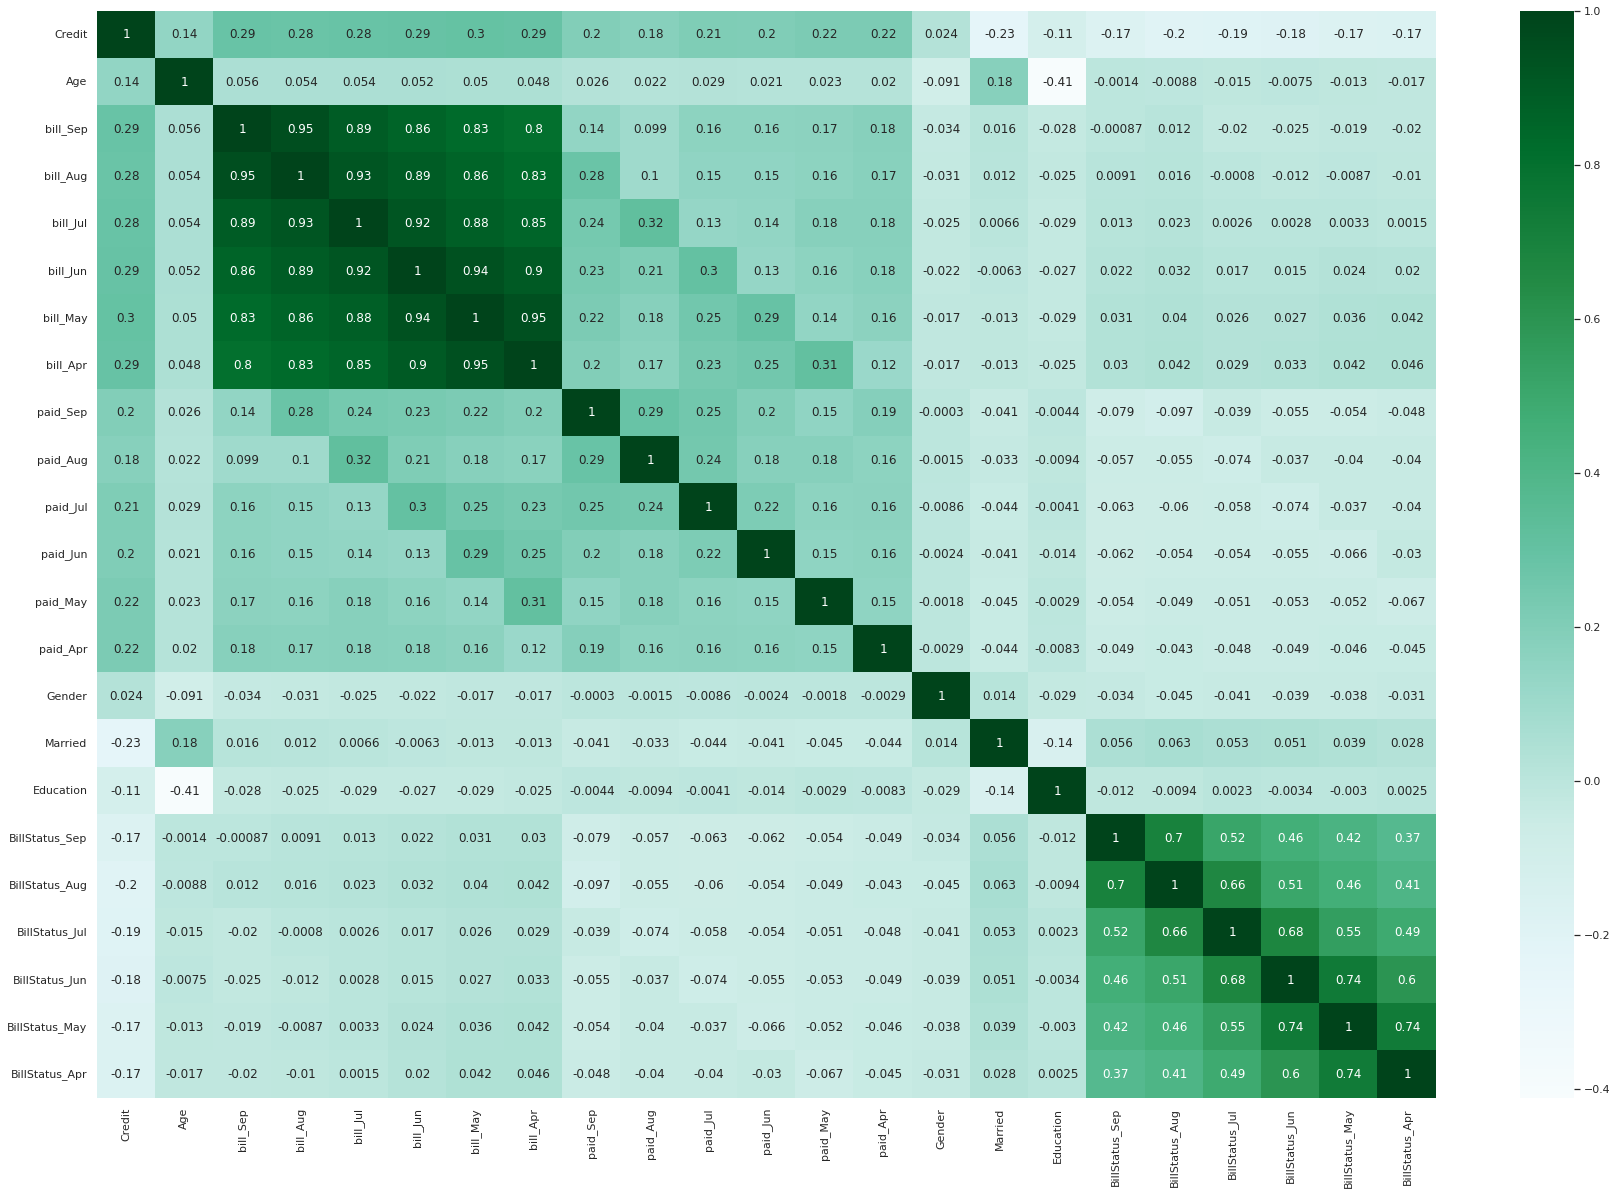

In [ ]:
correlation = scaled_df.corr()
sns.set(rc = {'figure.figsize': (30,20)})
sns.heatmap(correlation, annot = True, cmap = "BuGn")

In [ ]:
normal_summary = {
    "Variance" :df.var(),
    "Max Value" :df.max(),
    "Min Value" :df.min(),
    "Mean Value": df.mean()
                                  
}
pd.DataFrame(normal_summary).transpose().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
Variance,7.49012e+07,1.68318e+10,0.239189,0.554366,0.271845,84.9037,0.578611,0.642707,0.62306,0.577752,...,4.14281e+09,3.69983e+09,3.55012e+09,2.74526e+08,5.31578e+08,3.10371e+08,2.45743e+08,2.33648e+08,3.16448e+08,0.172244
Max Value,30000,1e+06,2,4,3,79,8,8,8,8,...,891586,927171,961664,873552,1.68426e+06,896040,621000,426529,528666,1
Min Value,1,10000,1,1,1,21,0,0,0,0,...,-170000,-81334,-339603,0,0,0,0,0,0,0
Mean Value,15005.6,167556,1.60401,1.84221,1.55715,35.4834,0.356599,0.319881,0.303692,0.258462,...,43279.3,40329,38889.9,5664.61,5925.72,5228.43,4829.87,4801.48,5220.71,0.221143


In [ ]:
scaled_summary = {
    "Variance" :scaled_df.var(),
    "Max Value" :scaled_df.max(),
    "Min Value" :scaled_df.min(),
    "Mean Value": scaled_df.mean()
                                  
}
pd.DataFrame(scaled_summary).transpose().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,Credit,Age,bill_Sep,bill_Aug,bill_Jul,bill_Jun,bill_May,bill_Apr,paid_Sep,paid_Aug,...,paid_Apr,Gender,Married,Education,BillStatus_Sep,BillStatus_Aug,BillStatus_Jul,BillStatus_Jun,BillStatus_May,BillStatus_Apr
Variance,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,...,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003,1.00003
Max Value,6.41649,4.72279,12.396,13.1264,23.3059,13.1799,14.5802,15.4875,52.3816,72.795,...,29.4257,0.809689,2.89813,2.76738,10.0485,9.58007,9.75045,10.1851,10.8567,10.8803
Min Value,-1.21444,-1.57187,-2.94309,-1.6708,-2.94443,-3.31366,-2.00021,-6.35248,-0.34189,-0.257018,...,-0.293485,-1.23504,-1.13118,-1.0686,-0.468807,-0.399015,-0.384747,-0.340042,-0.308497,-0.316567
Mean Value,-3.79487e-18,-2.20103e-16,-1.61282e-17,4.74359e-19,5.21795e-17,3.98462e-17,5.21795e-17,3.46282e-17,1.42308e-17,-1.04359e-17,...,9.60578e-18,-1.6318e-16,-5.4077e-17,2.08718e-17,-9.48719e-18,4.74359e-18,5.02821e-17,2.75128e-17,-5.88205e-17,-2.08718e-17


Al analizar ambas tablas, podemos notar que después de realizar la escala StandardScaler, la varianza de la mayoría de las columnas se mantuvo como una constante. Esto quiere decir que la varianza quedó equiparable para todas las columnas y eviataremos un PCA sesgado. 

In [ ]:
from sklearn.decomposition import PCA

pcs = PCA(n_components=8) # estimamos solamente dos principales componente
pcs_columns= ['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6','PC7','PC8']
pcs_t = pcs.fit_transform(scaled_df)
pca_df=pd.DataFrame(pcs_t, columns=pcs_columns)

In [ ]:
print(pcs.explained_variance_ratio_)

[0.25765732 0.17043411 0.07213071 0.06586346 0.04578837 0.04405246
 0.04146908 0.03847445]


De esta manera podemos comprobar que 8 componentes describen mas del 70% de nuestra varianza. Cabe recalcar que personalmente se cree que PCA no es el mejor acercamiento para reducir este dataset pues según la bibliografía consultada PCA no trabaja idealmente con datasets mixtos (que tienen variables de distintos tipos).

**IMPORTANCIA DE LAS VARIABLES**

In [ ]:
print(pd.DataFrame(abs( pcs.components_ ), columns= scaled_df.columns))

     Credit       Age  bill_Sep  bill_Aug  bill_Jul  bill_Jun  bill_May  \
0  0.169926  0.034429  0.371647  0.382222  0.387107  0.390159  0.386927   
1  0.146669  0.009058  0.031299  0.038237  0.041629  0.050376  0.056694   
2  0.252094  0.008550  0.196625  0.175236  0.121893  0.107713  0.087653   
3  0.095175  0.665595  0.016708  0.022277  0.020882  0.026740  0.027223   
4  0.488243  0.140426  0.040586  0.001717  0.044991  0.025528  0.010791   
5  0.146359  0.080606  0.003243  0.008520  0.007463  0.001606  0.013785   
6  0.000446  0.048542  0.025076  0.009230  0.020878  0.044241  0.041865   
7  0.057065  0.010115  0.017336  0.076849  0.098786  0.053685  0.057827   

   bill_Apr  paid_Sep  paid_Aug  ...  paid_Apr    Gender   Married  Education  \
0  0.379051  0.136396  0.117919  ...  0.106623  0.010616  0.013025   0.019959   
1  0.057309  0.059353  0.052750  ...  0.049959  0.033553  0.054831   0.000151   
2  0.074827  0.372570  0.401986  ...  0.310674  0.002096  0.189340   0.000997   


Como podemos darnos cuenta en ninguni de los componentes hay una variable que significativamente tenga una mayor importance sobre las otras. 

1. PC1:  Las siguientes variables tienen una importancia similar y es la más significat Age  bill_Sep  bill_Aug  bill_Jul  bill_Jun  bill_Ma

8. Elabora los histogramas de los atributos para visualizar su distribución.


Primero comenzaremos por visualizar la distribución de nuestros datos númericos escalados por StandardScaler. Estos fueron los atributos que utilizamos para el PCA.

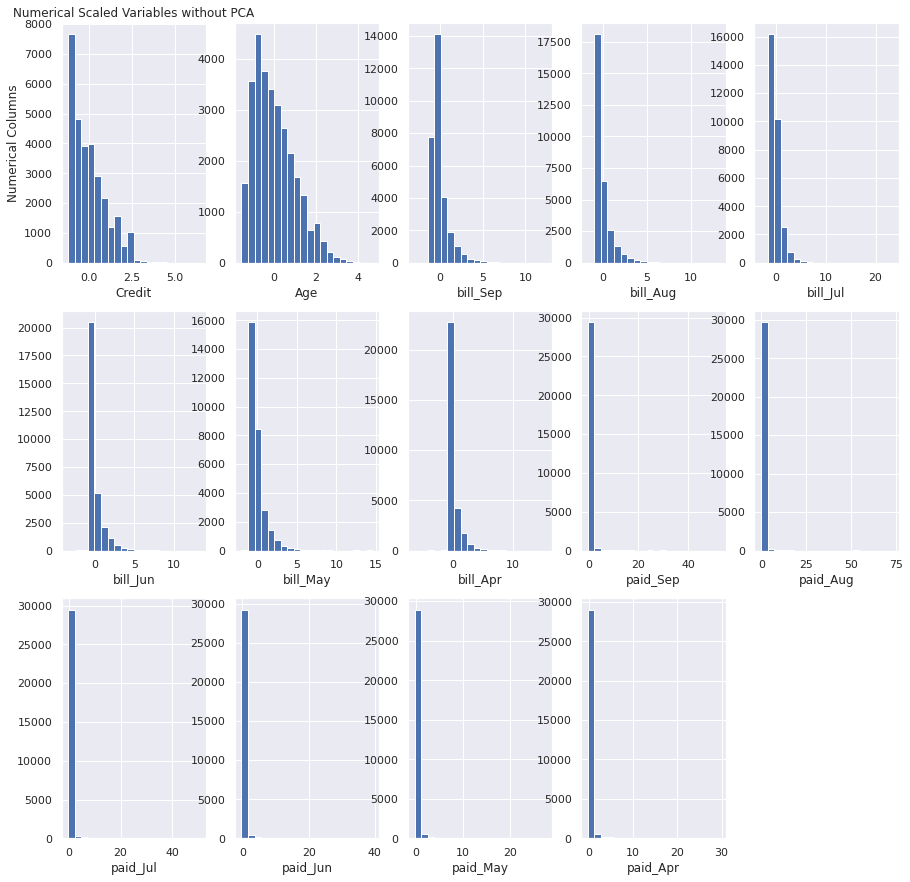

In [ ]:
Numerical_columns= ['Credit','Age', 'bill_Sep','bill_Aug','bill_Jul','bill_Jun','bill_May','bill_Apr', 'paid_Sep','paid_Aug','paid_Jul','paid_Jun','paid_May','paid_Apr']
sns.set(rc={'figure.figsize':(15,15)})
fig, axes = plt.subplots(1, 14)   
for k in range(0,14):  
  plt.subplot(3,5,k+1) 

  Transf0 = scaled_data[Numerical_columns].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=20) 
  plt.xlabel(Numerical_columns[k])
  if k==0:
    plt.ylabel('Numerical Columns')
    plt.title('Numerical Scaled Variables without PCA')

Podemos observar un sesgo positivo o a la derecha en la distribución de todos nuestros atributos originales. 

A continuación se muestra la distribución de nuestros atributos categóricos.

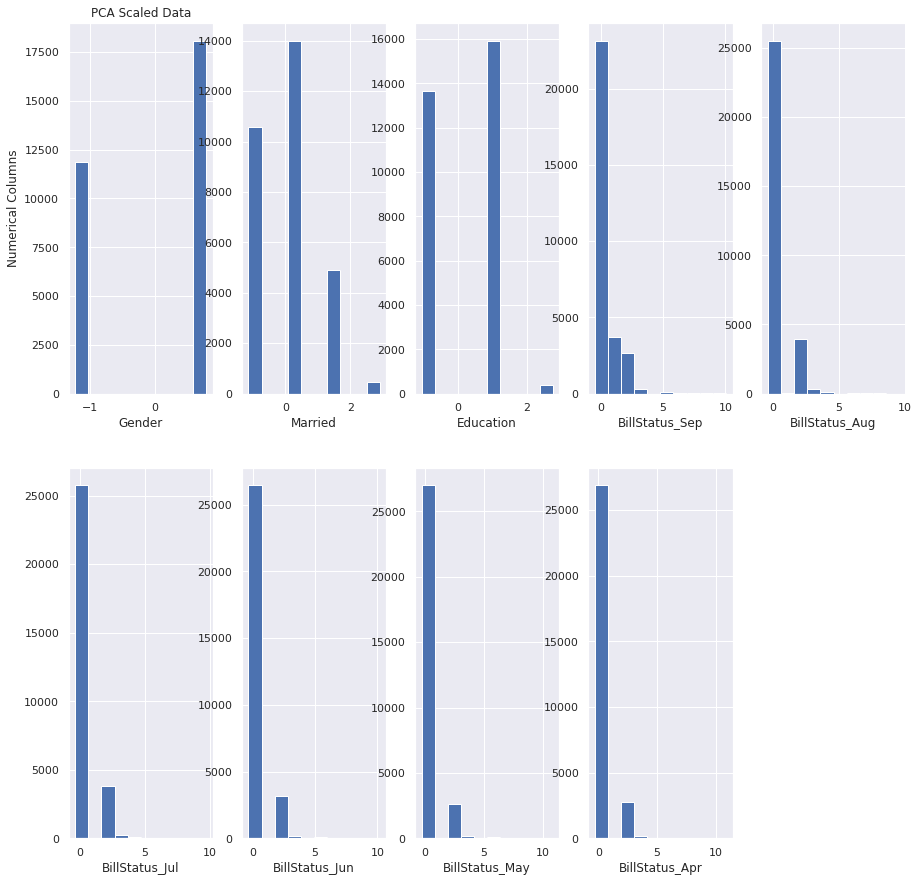

In [ ]:

Cat_columns= ['Gender', 'Married', 'Education', 'BillStatus_Sep','BillStatus_Aug','BillStatus_Jul','BillStatus_Jun','BillStatus_May', 'BillStatus_Apr']

sns.set(rc={'figure.figsize':(15,15)})
fig, axes = plt.subplots(1, 9)   
for k in range(0,9):  
  plt.subplot(2,5,k+1) 

  Transf0 = scaled_data_cat[Cat_columns].iloc[:,k] #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=10) 
  plt.xlabel(Cat_columns[k])
  if k==0:
    plt.ylabel('Numerical Columns')
    plt.title('PCA Scaled Data')

Similarmente, en las variables categóricas podemos observar un sesgo positivo o a la derecha en la distribución en la mayoría de los casos.

Finalmente, se muestra la distribución de nuestros componentes principales. 

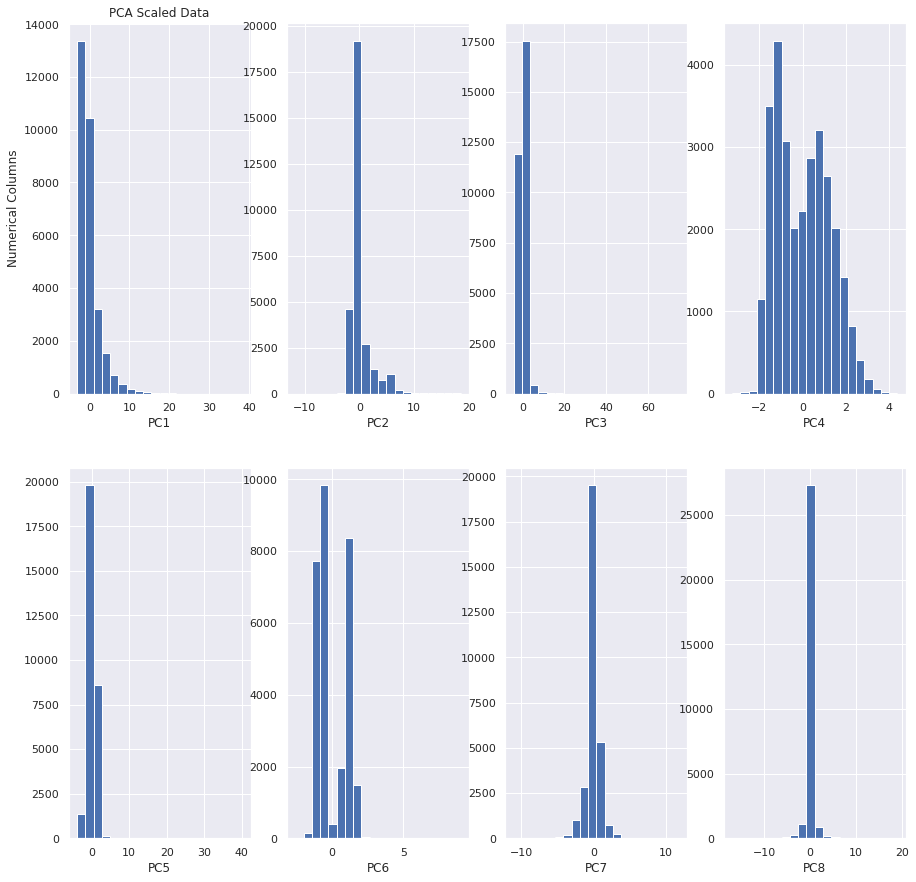

In [ ]:
PCA_columns= ['PC1','PC2','PC3', 'PC4', 'PC5', 'PC6','PC7','PC8']
sns.set(rc={'figure.figsize':(15,15)})
fig, axes = plt.subplots(1, 8)   
for k in range(0,8):  
  plt.subplot(2,4,k+1) 

  Transf0 = pca_df[PCA_columns].iloc[:,k] #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=20) 
  plt.xlabel(PCA_columns[k])
  if k==0:
    plt.ylabel('Numerical Columns')
    plt.title('PCA Scaled Data')

En este caso, podemos ver como la distribución de nuestros componentes comienza con un sesgo positivo y paulatinamente a lo largo de los componentes se va centrando hasta que en el PC8 tenemos una distribución bastante normal. 

9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.
10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

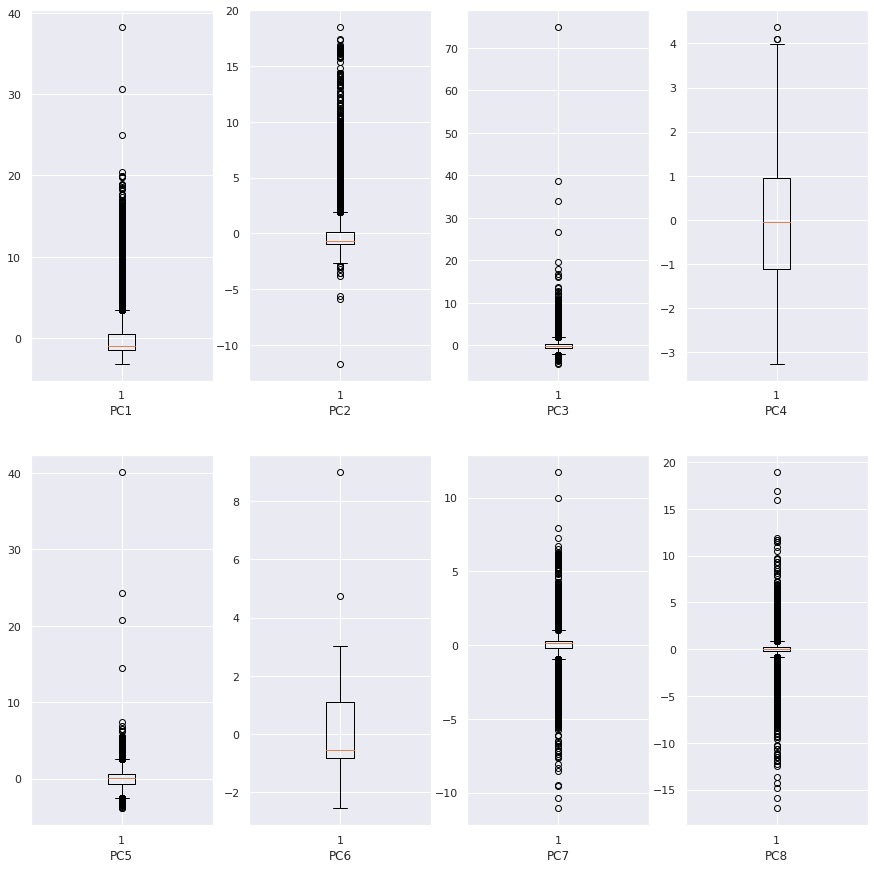

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
fig, axes = plt.subplots(1, 8)   
for k in range(0,8):  
  plt.subplot(2,4,k+1) 
  plt.boxplot(pca_df[pca_df.columns[k]])
  plt.xlabel(PCA_columns[k])
plt.show()

### **Interpretación**


Los siguientes gráficos boxplot nos muestran que tenemos una distribución de nuestros datos muy desordenada. En la gran mayoría de los casos, la mediana no se encuentra centrada, por lo que significa que tenemos una gran cantidad de datos en el extremo inferior y una cantidad menor de datos en el extremo superior. Adicionalmente, podemos ver como tenemos, en la gran mayoría de nuestros PCs, una enorme cantidad de datos outliers. En este sentido, esta gráfica nos hace inferir que una transformación de nuestros datos es necesaria antes de realizar PCA o que simplemente el PCA no es el mejor método de reducción. 

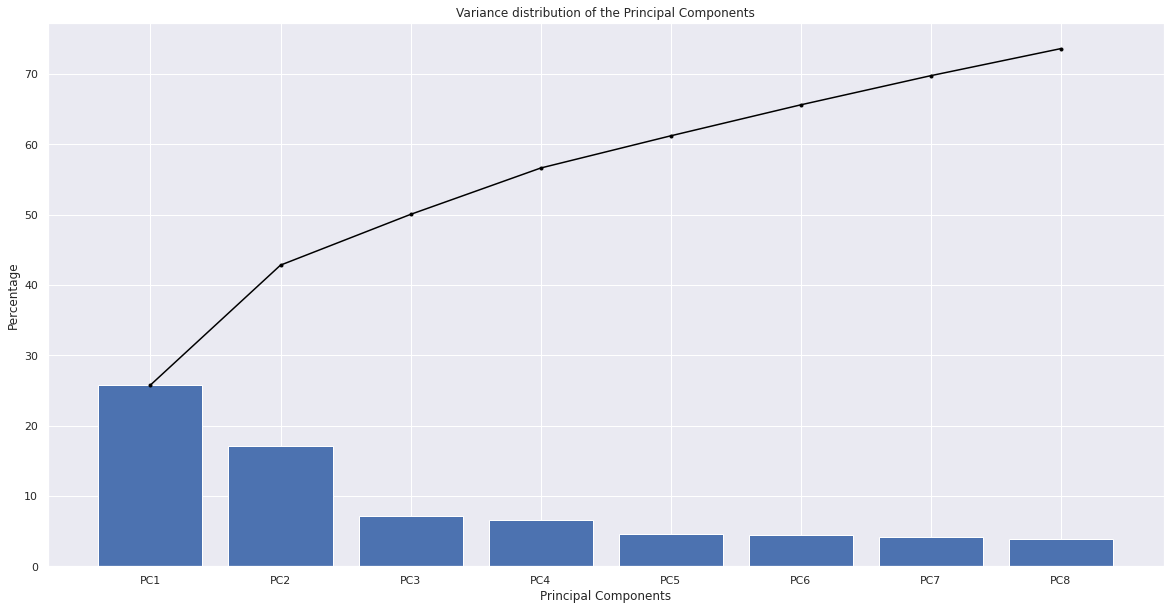

In [ ]:
Explained_var=  np.round(pcs.explained_variance_ratio_,4)*100
Acumulated_var= np.cumsum(pcs.explained_variance_ratio_)*100

fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(pcs_columns,Explained_var)
plt.plot(pcs_columns,Acumulated_var, color='black', marker='.')

plt.xlabel("Principal Components")
plt.ylabel("Percentage")
plt.title("Variance distribution of the Principal Components")
plt.show()

### **Interpretación**

El gráfico anterior nos permite visualizar la distribución de la varianza a lo largo de los 8 componentes principales. En este sentido, las gráficas de barra sirven como apoyo visual para percatarse la manera en como la mayoria de la varianza siempre se acumula principalmente en los dos primeros componentes y como, a partir de ellos, la explicación de la varianza va disminyuendo conforme se añade un componente extra. Adicionalmente, podemos visualizar por medio de la gráfica linear como la varianza explicada se va acumulando hasta alcanzar el 70% deseado y especificado por las instrucciones. 

In [ ]:
import plotly.express as px
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_df)

fig = px.scatter(components, x=0, y=1)
fig.show()

### **Interpretación**
Usualmente los diagramas de dispersión son una gráfica que se utiliza para mostrar la la relación entre dos variables en un conjunto de datos. Como podemos ver, esta relación podría visualizarse detectando patrones de comportamiento de los puntos de datos en el plano. Por ejemplo, si tienen una relación lineal entonces deberiamos de poder visualizar los puntos formados en una línea. Especificamente, según la bibliografía, los diagramas de dispersión en PCA muestran grupos de muestras en función de su similitud. 
Como sabemos, PCA no descarta muestras ni características (variables). En cambio, se utiliza para la reducción  de dimensiones mediante la construcción de componentes principales (PC). Los PC describen la variación y nos ayudan a percibir las influencias de las características originales. Dichas influencias, o cargas, se pueden rastrear desde el gráfico de dispersión de la PCA para averiguar qué produce las diferencias entre los conglomerados. Especificamente, en nuestro diagrama nosotos graficamos los primeros dos componentes. Idealmente, es necesario hacer una gráfica comparando cada PC contra cada PC. Sin embargo, como en nuestro caso los dos principales componentes describen la gran mayoria de nuestros datos, entonces solo comparamos ambos. 
En ese sentido, en nuestro gráfico es difícil encontrar clusters de muestras, lo único que podemos identificar es algunos outliers. Probablemente, esto también demuestra que PCA no es el mejor tratamiento de prepocesamiento para este conjunto de datos.

REFERENCIAS:

BioTuring Team, n. (2018, September 18). How to read PCA biplots and scree plots. Medium. Retrieved November 1, 2022, from https://bioturing.medium.com/how-to-read-pca-biplots-and-scree-plots-186246aae063#:~:text=A%20PCA%20plot%20shows%20clusters,constructing%20principal%20components%20(PCs). 

Hale, J. (2019). Scale, standardize, or normalize with Scikit-Learn. Towards Science. Retrieved November 2, 2022, from https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02 


Hartmann, K., Krois, J., Waske, B. (2018): E-Learning Project SOGA: Statistics and Geospatial Data Analysis. Department of Earth Sciences, Freie Universitaet Berlin.

Jaadi. (2022). A Step-by-Step Explanation of Principal Component Analysis (PCA). Built In. Retrieved 11 October 2022, from https://builtin.com/data-science/step-step-explanation-principal-component-analysis.

Towards Data Science. (2021). Understanding feature importance and how to implement it in Python. Towards Data Science. Retrieved October 27, 2022, from https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285 